In [125]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import numpy as np

df = pd.read_csv('Iris.csv')
df = df.drop(['Id'], axis=1)

rows = list(range(100,150))
df = df.drop(df.index[rows])
df = df.drop(['SepalWidthCm', 'PetalWidthCm'], axis=1)
df = df.drop(['Species'], axis=1)

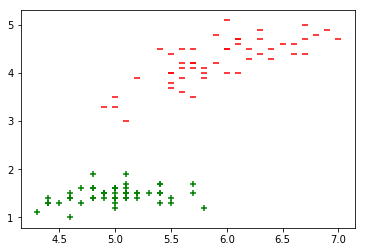

In [126]:
x = df['SepalLengthCm']
y = df['PetalLengthCm']

setosa_x = x[:50]
setosa_y = y[:50]

versicolor_x = x[50:]
versicolor_y = y[50:]

plt.figure()
plt.scatter(setosa_x, setosa_y, marker='+', color='green')
plt.scatter(versicolor_x, versicolor_y, marker='_', color='red')
plt.show()

In [132]:
# Since the first 50 are of one kind and the other 50 of the other
Y = [-1]*50 + [1]*50
X = df.values.tolist()
X, Y = shuffle(X, Y)

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8)

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

y_train = y_train.reshape(80,1)
y_test = y_test.reshape(20,1)

In [128]:
train_f1 = (x_train[:,0]).reshape(90,1)
train_f2 = (x_train[:,1]).reshape(90,1)

w1 = np.zeros((90,1))
w2 = np.zeros((90,1))

epochs = 1
alpha = 0.0001
while (epochs < 1000):
    y = w1 * train_f1 + w2 * train_f2
    prod =  y * y_train
    
    index = 0
    for val in prod:
        if val >= 1:
            cost = 0
            w1 = w1 - alpha * (2 * 1/epochs * w1)
            w2 = w2 - alpha * (2 * 1/epochs * w2)
        else:
            cost = 1 - val
            w1 = w1 + alpha * (train_f1[index] * y_train[index] - 2 * 1/epochs * w1)
            w2 = w2 + alpha * (train_f2[index] * y_train[index] - 2 * 1/epochs * w1)
        index += 1
    epochs += 1
print("done")

done


In [129]:
idx = list(range(10,90))

w1 = np.delete(w1, idx)
w2 = np.delete(w2, idx)

w1 = w1.reshape(10,1)
w2 = w2.reshape(10,1)

test_f1 = (x_test[:,0]).reshape(10,1)
test_f2 = (x_test[:,1]).reshape(10,1)

y_pred = w1 * test_f1 + w2 * test_f2
predictions = []
for val in y_pred:
    if(val > 1):
        predictions.append(1)
    else:
        predictions.append(-1)
        
# print(accuracy_score(y_pred, predictions))

In [130]:
print(accuracy_score(y_test, predictions))

1.0


In [142]:
clf = SVC()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print(clf.score(x_test, y_test))

1.0


/Users/ayanpaul/Library/Python/3.6/lib/python/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
